<a href="https://colab.research.google.com/github/Ashitha-K/Assignment/blob/main/assignment_model__selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [141]:
# loading the data set
data=pd.read_csv('/content/titanic_dataset .csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [143]:
data.drop('PassengerId',axis=1,inplace=True)

In [144]:
data.shape

(891, 11)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [146]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [147]:
#filling the missing values
data['Age']=data['Age'].fillna(data['Age'].median())
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [148]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


In [149]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [150]:
data.drop('Name',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)
data.drop('Cabin',axis=1,inplace=True)


<Axes: >

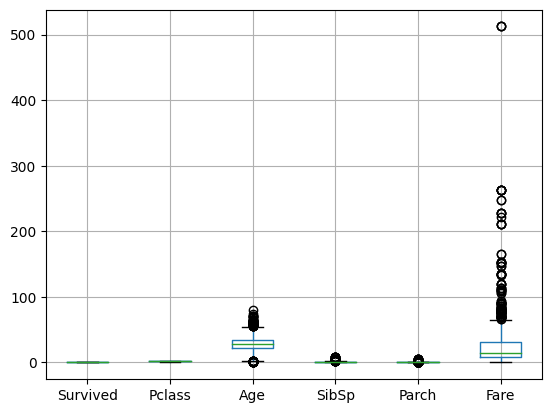

In [151]:
#checking for outlier
data.boxplot()

<Axes: >

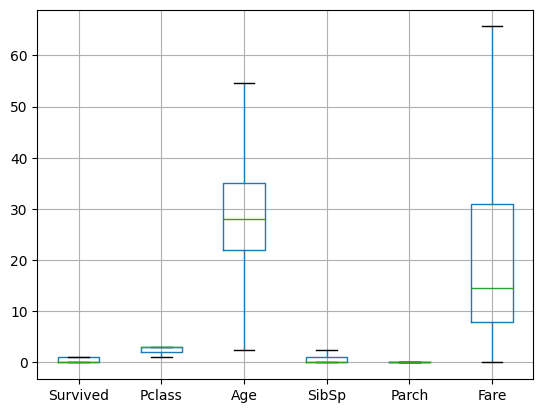

In [152]:
#Treating the outlier
outlier_col=['Age','Fare','SibSp','Parch']
Q1=data[outlier_col].quantile(0.25)
Q3=data[outlier_col].quantile(0.75)
IQR=Q3-Q1
#outlierb boundaries
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
#clip the outlier
data[outlier_col]=data[outlier_col].clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR,axis=1)
data.boxplot()



In [153]:
#Encoding
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0,7.2500,2
1,1,1,0,38.0,1.0,0,65.6344,0
2,1,3,0,26.0,0.0,0,7.9250,2
3,1,1,0,35.0,1.0,0,53.1000,2
4,0,3,1,35.0,0.0,0,8.0500,2


In [154]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0,7.2500,2
1,1,1,0,38.0,1.0,0,65.6344,0
2,1,3,0,26.0,0.0,0,7.9250,2
3,1,1,0,35.0,1.0,0,53.1000,2
4,0,3,1,35.0,0.0,0,8.0500,2


In [155]:
#scaling
sc=StandardScaler()
data['Age']=sc.fit_transform(data[['Age']])
data['Fare']=sc.fit_transform(data[['Fare']])
data['SibSp']=sc.fit_transform(data[['SibSp']])
data['Parch']=sc.fit_transform(data[['Parch']])
data['Embarked']=sc.fit_transform(data[['Embarked']])


In [156]:
#selecting X and y
x=data.drop('Survived',axis=1)
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [157]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [158]:
metric_k

[0.7847533632286996,
 0.7757847533632287,
 0.7937219730941704,
 0.7937219730941704,
 0.7892376681614349,
 0.7802690582959642,
 0.7802690582959642,
 0.7802690582959642,
 0.7802690582959642,
 0.7668161434977578,
 0.7802690582959642,
 0.7802690582959642]

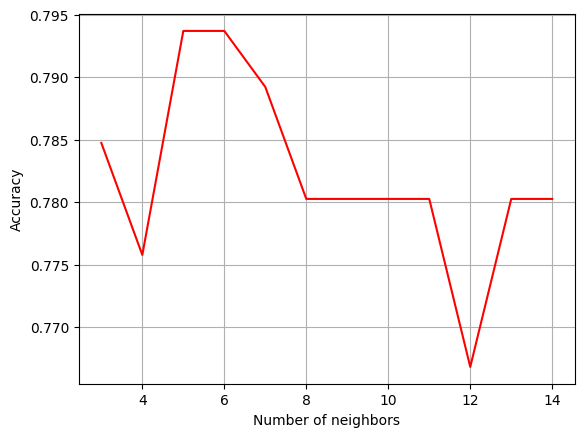

In [159]:
#Plotting graph to find out k
plt.plot(neighbors,metric_k,color='red')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [180]:
#taking k value as 5
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
#acc=accuracy_score(y_test,y_pred)

In [181]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7937219730941704
Precision is 0.7471264367816092
Recall is 0.7303370786516854
f1 score is 0.7386363636363638


In [186]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kfold_val=KFold(n_splits=10,random_state=42,shuffle=True)
for train_index,test_index in kfold_val.split(x,y):
   print('training index:', train_index)
   print('testing index:',test_index)

training index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  68  69  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 139
 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 209 212 213 214 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241
 242 243 245 246 247 248 249 251 252 253 255 256 257 258 259 260 261 262
 263 264 265 267 268 269 270 271 27

In [187]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(model,x,y,cv=kfold_val)
np.mean(kv_result)

0.7979525593008739

In [190]:
#Stratified cross validation
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(10)

In [191]:
skv_result=cross_val_score(model,x,y,cv=sk_fold)
np.mean(skv_result)

0.7991510611735331

In [192]:
#SVM model
from sklearn.svm import  SVC
sv_clf=SVC(kernel='linear')
model_svm=sv_clf.fit(x_train,y_train)

In [193]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))


Accuracy is 0.7847533632286996
Precision is 0.7411764705882353
Recall is 0.7078651685393258
f1 score is 0.7241379310344828


In [194]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kfold_val=KFold(n_splits=10,random_state=42,shuffle=True)
for train_index,test_index in kfold_val.split(x,y):
   print('training index:', train_index)
   print('testing index:',test_index)

training index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  64  65  68  69  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 139
 140 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 193 194 195 197 199
 200 201 202 203 205 206 207 209 212 213 214 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241
 242 243 245 246 247 248 249 251 252 253 255 256 257 258 259 260 261 262
 263 264 265 267 268 269 270 271 27

In [199]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(model_svm,x,y,cv=kfold_val)
np.mean(kv_result)


0.7867290886392009

In [197]:
#Stratified cross validation
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(10)

In [198]:
skv_result=cross_val_score(model_svm,x,y,cv=sk_fold)
np.mean(skv_result)

0.786729088639201